In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Nishant\Desktop\tasks and projects of data science\resume projects\Customer churn prediction\Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
mapping = {0:'Retained',
          1:'Churned'} 
data['Exited'] = data['Exited'].map(mapping)

<AxesSubplot:xlabel='Exited', ylabel='count'>

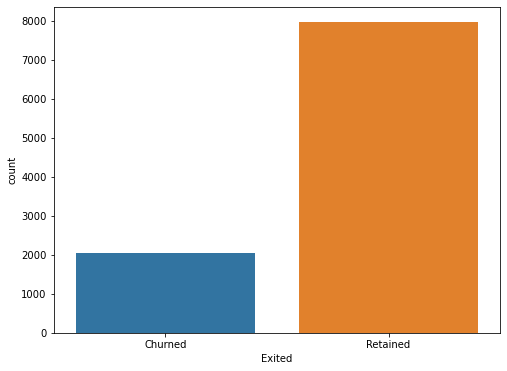

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data['Exited'])


In [11]:
# now we will check visualization of numerics and categorical so need to split them
continous = ['Age','CreditScore','Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>]], dtype=object)

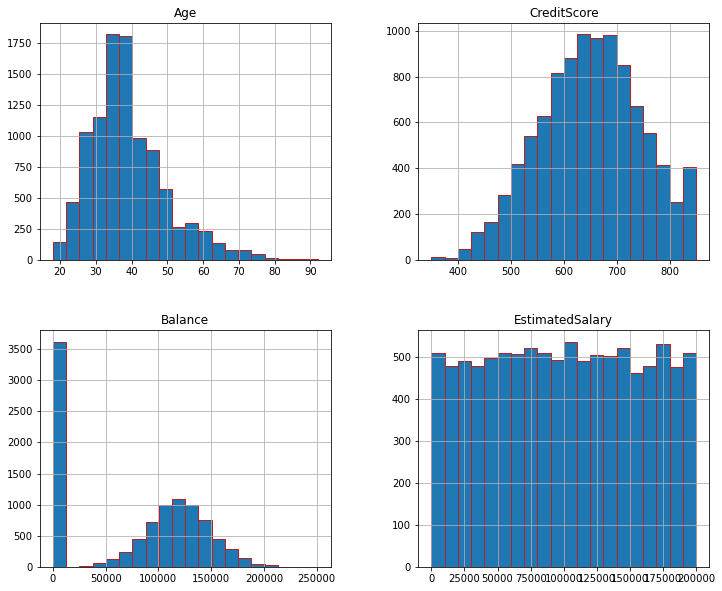

In [12]:
data[continous].hist(figsize=(12,10),
                          bins=20, edgecolor='firebrick',layout=(2,2))

<AxesSubplot:>

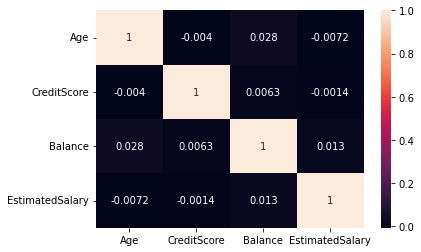

In [13]:
# to find corelation between these attributes
sns.heatmap(data[continous].corr(), annot=True)

there is no corelation between these attributes

# for numeric variable

<AxesSubplot:xlabel='Age', ylabel='Exited'>

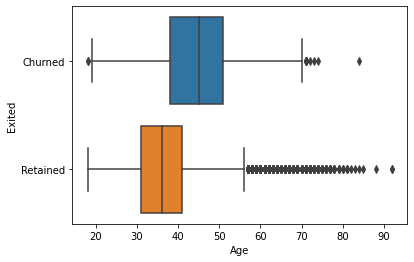

In [14]:
sns.boxplot(data=data, x='Age',y='Exited')

from this we can see that customer having age between 40 to 50 are more likely to churn

<AxesSubplot:xlabel='CreditScore', ylabel='Exited'>

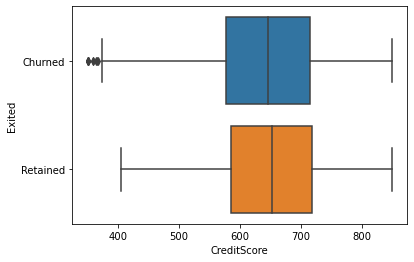

In [15]:
sns.boxplot(data=data, x='CreditScore',y='Exited')

from this graph there is no relation of credit score with churned

<AxesSubplot:xlabel='Balance', ylabel='Exited'>

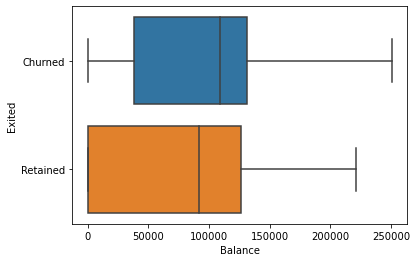

In [16]:
sns.boxplot(data=data, x='Balance',y='Exited')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Exited'>

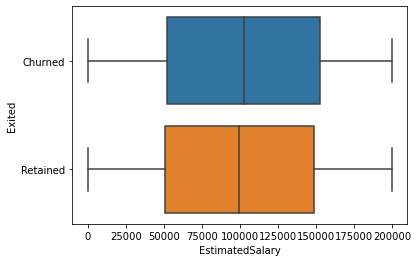

In [17]:
sns.boxplot(data=data, x='EstimatedSalary',y='Exited')

# for categorical

In [18]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

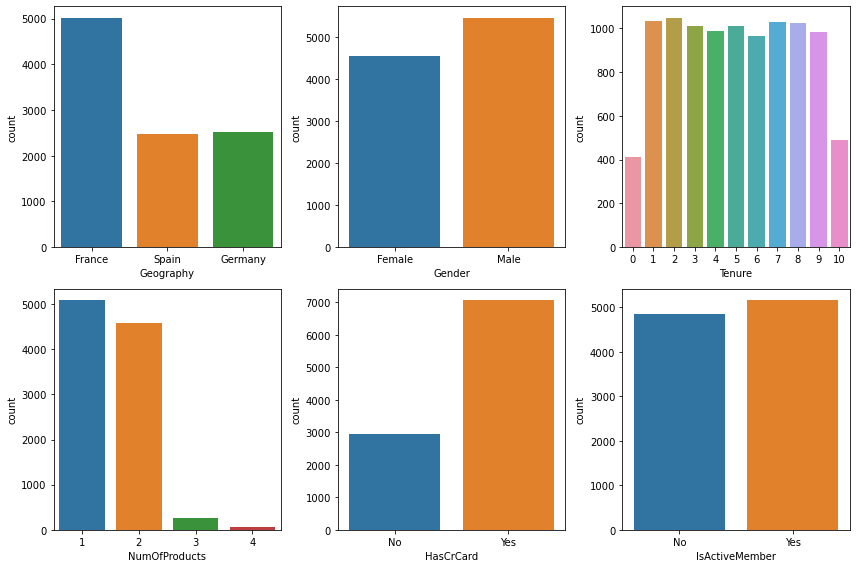

In [19]:
category = data[categorical]
plt.subplots(2,3, figsize=(12,8))
for index, columns in enumerate(category.columns):
    plt.subplot(2,3, index+1)
    sns.countplot(x=columns, data=data)
    
    plt.ylabel('count')
    if (columns == 'HasCrCard' or columns == 'IsActiveMember'):
        plt.xticks([0,1], ['No','Yes'])
plt.tight_layout();    

The bank has customers in three countries (France, Spain, and Germany). Most customers are in France.

There are more male customers than females,

Only a small percentage leaves within the first year. The count of customers in tenure years between 1 and 9 is almost the same,

Most of the customers have purchased 1 or 2 products, while a small portion has purchased 3 and 4,

A significant majority of customers has a credit card, and

Almost 50% of customers are not active.

In [20]:
import matplotlib.ticker as mtick
def plot_categorical(feature,ylog=False):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
    
    s = sns.countplot(ax=ax1, x=feature, data=data, hue='Exited', palette=['r','g']) # for graph 1
    ax1.set_title(feature)
    ax1.legend(['Retained','Churned'])
    
    s = round(data[data['Exited']=='Churned'][feature].value_counts()/data[data['Exited']=='Retained']
              [feature].value_counts()*100,2).reset_index().plot(ax=ax2,
                                                                 x='index', y=feature, kind='bar',color=['pink','orange','blue'])
       
    ax2.set_title('Churn Rate')
    ax2.get_legend().remove()
    ax2.set_title(feature +' defaulter%')
    ax2.set_xlabel(feature)
    
    if (feature == 'HasCrCard' or feature == 'IsActiveMember'): # this are the numeric so we set them different labels
        ax1.set_xticklabels(['No','Yes'])
        ax2.set_xticklabels(['No','Yes'])
        #linear', 'log', 'symlog', 'logit', 'function', 'functionlog'

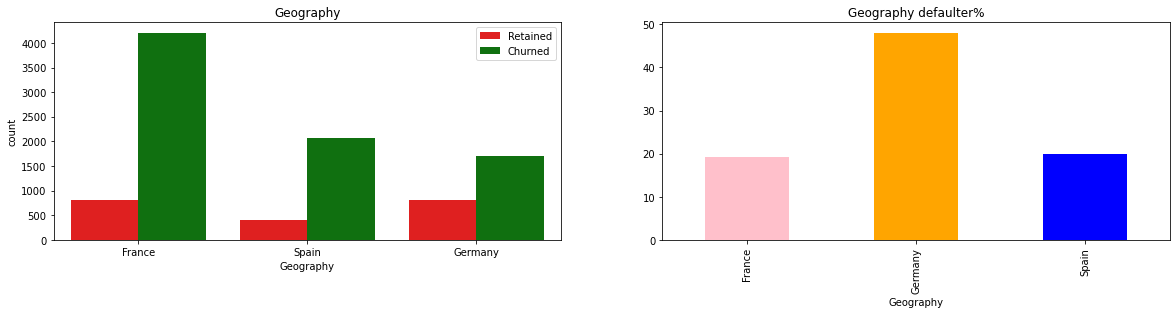

In [21]:
plot_categorical('Geography')

Customers in Germany are more likely to churn than customers in the other two countries (the churn rate is almost double compared to Spain and France). Many reasons could explain this finding, such as higher competition or different preferences for German customers

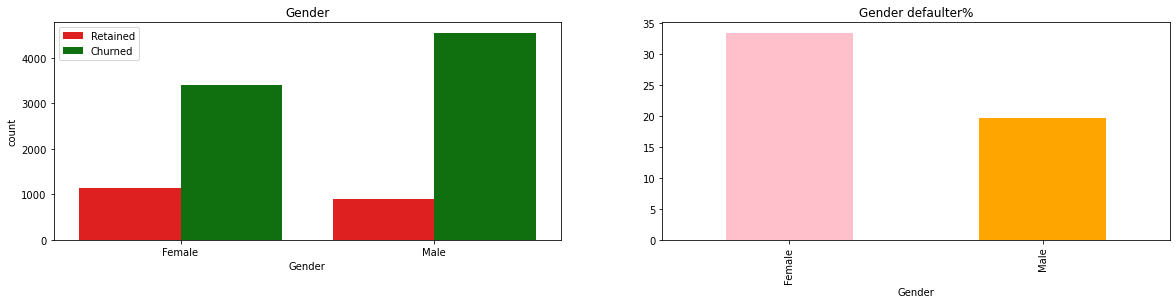

In [22]:
plot_categorical('Gender')

Female customers are more likely to churn.

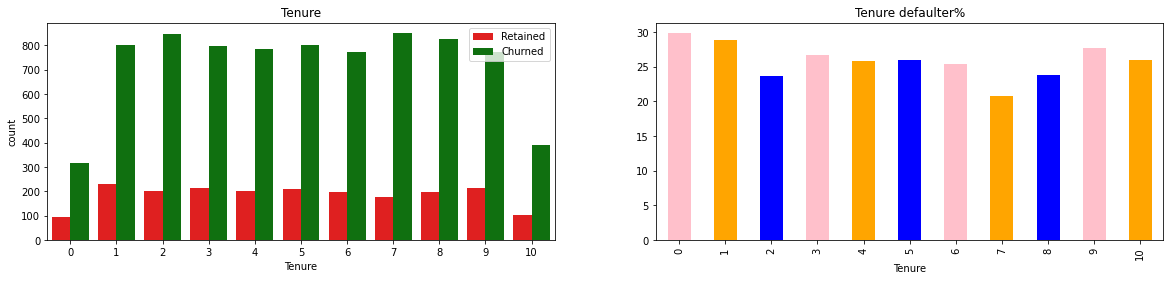

In [23]:
plot_categorical('Tenure')

The number of years (tenure) does not seem to affect the churn rate.

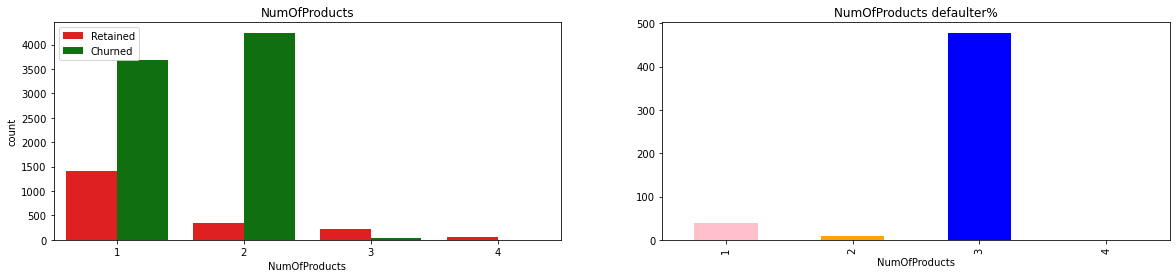

In [24]:
plot_categorical('NumOfProducts')

 having 3 products significantly increases the likelihood of churn

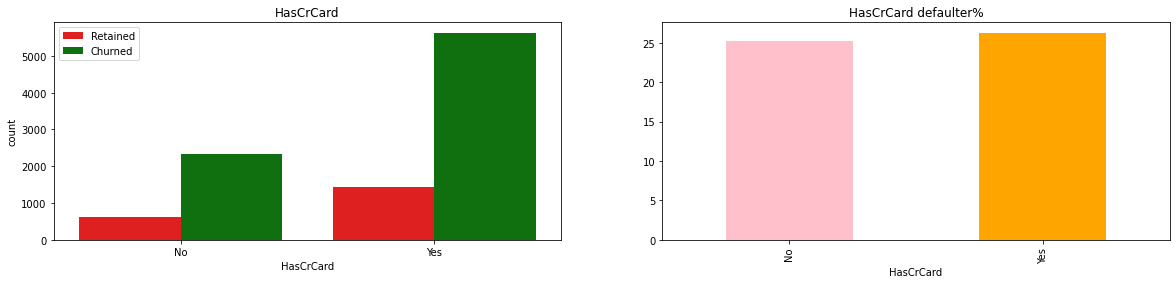

In [25]:
plot_categorical('HasCrCard')

Having a credit card does not seem to affect the churn rate.

as we can see having product 3 and 4 increases chances of churn

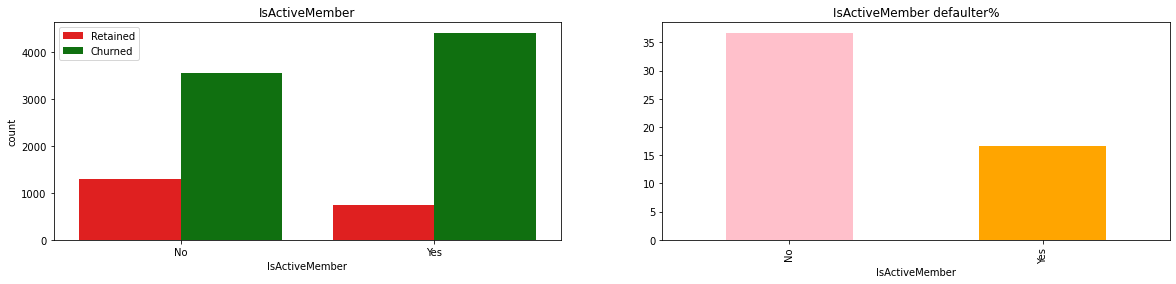

In [26]:
plot_categorical('IsActiveMember')

that inactive customers are more likely to churn. A significant portion of the clientele is inactive; therefore, the bank will benefit from changing its policy so that more customers become active.



# Data preprocessing

In [27]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Churned
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Retained
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Churned
3,699,France,Female,39,1,0.00,2,0,0,93826.63,Retained
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Retained


as we found Tenure , Hascrcard , Estimated salary and credit score have no relation with cuhrn we can drop this attributes

In [28]:
data = data.drop(['Tenure','HasCrCard','EstimatedSalary','CreditScore'],axis=1)

In [29]:
data.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,France,Female,42,0.00,1,1,Churned
1,Spain,Female,41,83807.86,1,1,Retained
2,France,Female,42,159660.80,3,0,Churned
3,France,Female,39,0.00,2,0,Retained
4,Spain,Female,43,125510.82,1,1,Retained


In [30]:
mapping = {'Churned':1,
          'Retained':0}

data['Exited'] = data['Exited'].map(mapping)

In [31]:
data.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,France,Female,42,0.00,1,1,1
1,Spain,Female,41,83807.86,1,1,0
2,France,Female,42,159660.80,3,0,1
3,France,Female,39,0.00,2,0,0
4,Spain,Female,43,125510.82,1,1,0


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Geography'] = encoder.fit_transform(data['Geography'])

In [33]:
data.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,0,Female,42,0.00,1,1,1
1,2,Female,41,83807.86,1,1,0
2,0,Female,42,159660.80,3,0,1
3,0,Female,39,0.00,2,0,0
4,2,Female,43,125510.82,1,1,0


In [34]:
data['Gender'] = encoder.fit_transform(data['Gender'])

In [35]:
data.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,0,0,42,0.00,1,1,1
1,2,0,41,83807.86,1,1,0
2,0,0,42,159660.80,3,0,1
3,0,0,39,0.00,2,0,0
4,2,0,43,125510.82,1,1,0


In [36]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [37]:
x

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,0,0,42,0.00,1,1
1,2,0,41,83807.86,1,1
2,0,0,42,159660.80,3,0
3,0,0,39,0.00,2,0
4,2,0,43,125510.82,1,1
...,...,...,...,...,...,...
9995,0,1,39,0.00,2,0
9996,0,1,35,57369.61,1,1
9997,0,0,36,0.00,1,1
9998,1,1,42,75075.31,2,0


In [38]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [39]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Class imbalance is usually a problem and occurs in many real-world tasks.
Classification using imbalanced data is biased in favour of the majority class,
meaning that machine learning algorithms will likely result in models that do little more than predict the most common class.
Additionally, common metrics can be misleading when handling class-imbalanced data 
(e.g. if a dataset contains 99.9% 0s and 0.01% 1s, a classifier that always predicts 0 will have 99.9% accuracy)

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
over = SMOTE(sampling_strategy='auto', random_state=42)
x, y = over.fit_resample(x, y)

y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [42]:
y.shape

(15926,)

In [43]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

In [44]:
x = scaling.fit_transform(x)

In [45]:
x

array([[-8.91402837e-01, -8.62873301e-01,  1.02686621e-01,
        -1.33309485e+00, -7.33275161e-01,  1.27986924e+00],
       [ 1.68088953e+00, -8.62873301e-01,  3.73417190e-03,
         3.07926781e-02, -7.33275161e-01,  1.27986924e+00],
       [-8.91402837e-01, -8.62873301e-01,  1.02686621e-01,
         1.26522199e+00,  2.69491806e+00, -7.81329819e-01],
       ...,
       [ 3.94743347e-01, -8.62873301e-01, -2.93123174e-01,
         3.53257299e-01, -7.33275161e-01, -7.81329819e-01],
       [-8.91402837e-01, -8.62873301e-01,  8.94306211e-01,
        -1.33309485e+00,  4.40901467e+00, -7.81329819e-01],
       [-8.91402837e-01, -8.62873301e-01, -1.87636235e+00,
        -1.33309485e+00, -7.33275161e-01, -7.81329819e-01]])

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [98]:
from sklearn.model_selection import GridSearchCV

# building machine learning models with all algorithms

# 1) SVC

In [99]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

In [94]:
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

[[1339  294]
 [ 256 1297]]


In [96]:
ac_svc = accuracy_score(y_test, y_pred_svc)
print('Accuracy of SVM model is :', ac_svc)

Accuracy of SVM model is : 0.8273697426239799


In [52]:
bias_svc = svc.score(x_train, y_train)
bias_svc

0.8233908948194663

In [53]:
variance_svc = svc.score(x_test, y_test)
variance_svc

0.8273697426239799

# Accuracy of SVM model is : 0.8273697426239799

# 2)  Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [55]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[1274  359]
 [ 350 1203]]


In [57]:
ac_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy of GaussianNB model is :', ac_nb)

Accuracy of GaussianNB model is : 0.7774639045825487


In [58]:
bias_nb = nb.score(x_train, y_train)
bias_nb

0.7755886970172684

In [59]:
variance_nb = nb.score(x_test, y_test)
variance_nb

0.7774639045825487

# Accuracy of GaussianNB model is : 0.7774639045825487

# 3) logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

logit.fit(x_train, y_train)

LogisticRegression()

In [61]:
y_pred_logit = logit.predict(x_test)
y_pred_logit

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm_logit = confusion_matrix(y_test, y_pred_logit)
print(cm_logit)

[[1225  408]
 [ 367 1186]]


In [63]:
ac_logit = accuracy_score(y_test, y_pred_logit)
print('Accuracy of Logistic Regression model is :', ac_logit)

Accuracy of Logistic Regression model is : 0.7567482736974263


In [64]:
bias_logit = logit.score(x_train, y_train)
bias_logit

0.7635007849293564

In [65]:
variance_logit = logit.score(x_test, y_test)
variance_logit

0.7567482736974263

# Accuracy of Logistic Regression model is : 0.7567482736974263

# 4) Random forest classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100,criterion='entropy')

rfr.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [67]:
y_pred_rfr = rfr.predict(x_test)
y_pred_rfr

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm_rfr = confusion_matrix(y_test, y_pred_rfr)
print(cm_rfr)

[[1344  289]
 [ 251 1302]]


In [69]:
ac_rfr = accuracy_score(y_test, y_pred_rfr)
print('Accuracy of RandomForest Classifier model is :', ac_rfr)

Accuracy of RandomForest Classifier model is : 0.8305084745762712


In [70]:
bias_rfr = rfr.score(x_train, y_train)
bias_rfr

0.9700156985871271

In [71]:
variance_rfr = rfr.score(x_test, y_test)
variance_rfr

0.8305084745762712

# Accuracy of RandomForest Classifier model is : 0.8258003766478342 but 
# model is underfitting in randomforest we cant take this model for further 
# deployment

# 5) Gradient boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [73]:
y_pred_gb = gb.predict(x_test)
y_pred_gb

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

[[1346  287]
 [ 263 1290]]


In [75]:
ac_gb = accuracy_score(y_test, y_pred_gb)
print('Accuracy of RandomForest Classifier model is :', ac_gb)

Accuracy of RandomForest Classifier model is : 0.8273697426239799


In [76]:
bias_gb = gb.score(x_train, y_train)
bias_gb

0.8320251177394035

In [77]:
variance_gb = gb.score(x_test, y_test)
variance_gb

0.8273697426239799

# Accuracy of Gradient Boosting Classifier model is : 0.8273697426239799